# 라이브러리

In [ ]:
!pip install -r requirements.txt

In [1]:
from baseball_vision.PoseAnalysisProcessor import PoseAnalysisProcessor
from baseball_vision.InteractivePoseVisualizer import InteractivePoseVisualizer
import baseball_vision.tool as bvtool
import baseball_vision.draw_3d as d3d
import config
import os

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# 실행 부분

In [2]:
target_name = "이지헌"
video_name = "raw_data/" + target_name + ".mov"

tool = bvtool.PitcherAnalysisTool()
processor = PoseAnalysisProcessor(config.OUTPUT_DIR)
all_frames_3d_landmarks, fps = processor.process_video(video_name, target_name, tool)

MediaPipe Pose를 초기화합니다...
비디오 처리 시작...
처리 중: 100.00% (133/133 프레임)
비디오 객체를 해제합니다...


In [5]:
print(tool.get_dataframe())
tool.save(config.OUTPUT_DIR + "/" + target_name + "_angle_data")

     R Elbow  L Elbow  R Shoulder  L Shoulder  Body Twist  R Knee  L Knee
0     127.56   103.68       97.79      125.31       21.58  156.38  142.02
1     126.95   105.04       97.72      124.28       20.55  155.93  142.34
2     126.22   106.12       97.27      123.63       20.25  155.75  142.58
3     126.70   106.22       97.33      123.64       20.01  156.01  143.12
4     128.13   106.59       97.64      123.44       19.11  156.27  143.21
..       ...      ...         ...         ...         ...     ...     ...
174   160.33    95.13       60.10      148.56      -26.73  172.23  163.61
175   160.71    94.43       60.25      146.79      -26.23  179.57  160.15
176   140.21    95.27       62.04      149.99      -27.24  170.70  163.20
177   126.84    92.24       66.27      148.56      -24.27  168.58  169.34
178   126.39    93.70       67.65      148.11      -24.65  165.45  172.59

[179 rows x 7 columns]


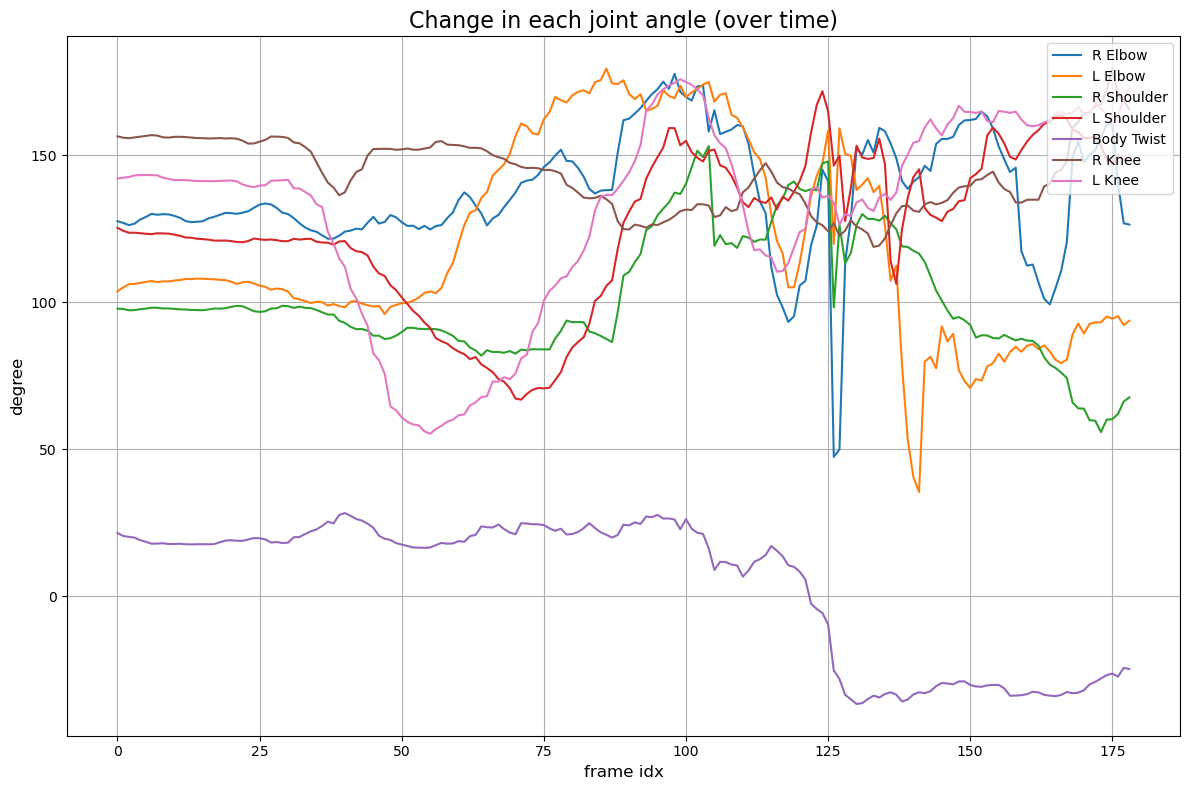

In [6]:
tool.show_graph()

In [4]:
# --- Export 3D data to C3D file ---
c3d_output_path = os.path.join(config.OUTPUT_DIR, target_name + '_3d_pose.c3d')
d3d.export_to_c3d(c3d_output_path, all_frames_3d_landmarks, fps)

총 159 프레임을 result_data\강두흔_3d_pose.c3d으로 성공적으로 내보냈습니다.


C:\Temp\Anaconda\Lib\site-packages\c3d\c3d.py:1210: UserWarning: missing parameter POINT:LABELS
  warnings.warn('missing parameter {}'.format(name))
C:\Temp\Anaconda\Lib\site-packages\c3d\c3d.py:1219: UserWarning: No analog data found in file.
  warnings.warn('No analog data found in file.')


In [5]:
interactive_viz = InteractivePoseVisualizer(all_frames_3d_landmarks, fps)
#interactive_viz.run()
d3d.show_3d_video(all_frames_3d_landmarks, fps)

[Open3D INFO] Window window_0 created.
[Open3D INFO] ICE servers: ["stun:stun.l.google.com:19302", "turn:user:password@34.69.27.100:3478", "turn:user:password@34.69.27.100:3478?transport=tcp"]
[Open3D INFO] Set WEBRTC_STUN_SERVER environment variable add a customized WebRTC STUN server.
[Open3D INFO] WebRTC Jupyter handshake mode enabled.

--- 3D 인터랙티브 포즈 애니메이션 조작 방법 ---
  Spacebar: 재생/일시정지
  'A' 또는 Left Arrow: 이전 프레임
  'D' 또는 Right Arrow: 다음 프레임
  'W' 또는 Up Arrow: 재생 속도 증가
  'S' 또는 Down Arrow: 재생 속도 감소
  'R': 카메라 뷰 초기화
  'Q': 시각화 종료
---------------------------------------------
3D 시각화를 시작합니다. 창을 닫으면 종료됩니다.


Y/N n


3D 시각화가 종료되었습니다.
